# Node and Edge ( Adjacency Matrix / Edge Lists )

## Data

In [1]:
import json
import numpy as np
np.set_printoptions( precision=2, edgeitems=6, linewidth=240 )

### Raw Data

In [2]:
data_paths = [ "../data/shanghan_formulas.json",  "../data/shanghan_herbs.json" ]
s_fmls_, s_herbs_ = [ json.loads( open(data_path, 'r', encoding='utf-8').read() ) for data_path in  data_paths ]
s_fmls = s_fmls_.get('formulas').items()
fml_list = [ list( fml[1].get('ingOrg').keys() ) for fml in s_fmls ]
fml_corpus = [ " ".join(fml) for fml in fml_list ]

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

min_df = 5
vectorizer = CountVectorizer( min_df=min_df )
X = vectorizer.fit_transform( fml_corpus)
herb_names =  vectorizer.get_feature_names()
herb_freq = np.sum( X, 0 ).tolist()[0]
print( X.shape )
print( herb_names )
print( herb_freq )

(219, 34)
['감초', '갱미', '건강', '계지', '과루근', '귤피', '대조', '대황', '도인', '마황', '망초', '모려', '반하', '복령', '부자', '생강', '석고', '세신', '시호', '아교', '오미자', '용골', '인삼', '작약', '정력', '지실', '치자', '택사', '행인', '향시', '황금', '황기', '황련', '후박']
[106, 7, 31, 61, 5, 5, 59, 29, 7, 23, 8, 7, 36, 33, 27, 61, 12, 9, 7, 6, 6, 6, 31, 41, 5, 16, 10, 8, 16, 6, 20, 7, 13, 10]


In [4]:
herb_co = X.T * X

print( "# HERB NETWORK MATRIX according to co-occurrence", herb_co.shape )
print( herb_co.toarray() )

# HERB NETWORK MATRIX according to co-occurrence (34, 34)
[[106   6  19  46   3   1 ...  12   1  12   5   6   3]
 [  6   7   1   1   0   0 ...   0   0   0   0   0   0]
 [ 19   1  31   5   1   0 ...   2   0   6   0   5   0]
 [ 46   1   5  61   2   0 ...   6   0   4   5   1   3]
 [  3   0   1   2   5   0 ...   0   0   2   0   0   0]
 [  1   0   0   0   0   5 ...   0   0   0   0   0   0]
 ...
 [ 12   0   2   6   0   0 ...  16   0   0   0   0   2]
 [  1   0   0   0   0   0 ...   0   6   0   0   0   0]
 [ 12   0   6   4   2   0 ...   0   0  20   0   8   0]
 [  5   0   0   5   0   0 ...   0   0   0   7   0   0]
 [  6   0   5   1   0   0 ...   0   0   8   0  13   0]
 [  3   0   0   3   0   0 ...   2   0   0   0   0  10]]


In [5]:
output_file_path = "../data/shanghan_herb_matrix.tsv"
header = "\t".join( herb_names )
np.savetxt( output_file_path, herb_co.toarray(), fmt='%d', delimiter='\t', newline='\n', header=header, footer='', comments='# ')

### Data Structure : Adjacency Matrix / Edge Lists 

In [6]:
labels = herb_names
adjacency_matrix = np.loadtxt( output_file_path, dtype=np.int, comments='#', delimiter="\t")
n, _ = adjacency_matrix.shape
print( "# Adjacency Matrix of Networks")
print( adjacency_matrix )

# Adjacency Matrix of Networks
[[106   6  19  46   3   1 ...  12   1  12   5   6   3]
 [  6   7   1   1   0   0 ...   0   0   0   0   0   0]
 [ 19   1  31   5   1   0 ...   2   0   6   0   5   0]
 [ 46   1   5  61   2   0 ...   6   0   4   5   1   3]
 [  3   0   1   2   5   0 ...   0   0   2   0   0   0]
 [  1   0   0   0   0   5 ...   0   0   0   0   0   0]
 ...
 [ 12   0   2   6   0   0 ...  16   0   0   0   0   2]
 [  1   0   0   0   0   0 ...   0   6   0   0   0   0]
 [ 12   0   6   4   2   0 ...   0   0  20   0   8   0]
 [  5   0   0   5   0   0 ...   0   0   0   7   0   0]
 [  6   0   5   1   0   0 ...   0   0   8   0  13   0]
 [  3   0   0   3   0   0 ...   2   0   0   0   0  10]]


### Build Adjacency Matrix from Edge List

In [7]:
# Adjacency Matrix to Edge List
edge_list = []
for i in range(n):
    for j in range(n):
        elem = ( labels[i], labels[j], adjacency_matrix[i, j] )
        edge_list.append( elem )

print( "# Edge List of Networks")
for e in edge_list[:10]: print( e )

# Edge List of Networks
('감초', '감초', 106)
('감초', '갱미', 6)
('감초', '건강', 19)
('감초', '계지', 46)
('감초', '과루근', 3)
('감초', '귤피', 1)
('감초', '대조', 52)
('감초', '대황', 6)
('감초', '도인', 1)
('감초', '마황', 20)


### Build Adjacency Matrix from Edge List

In [8]:
edge_list_arr = np.array( edge_list )
m1 = len( set( list( edge_list_arr[:,0] ) ) )
m2 = len( set( list( edge_list_arr[:,1] ) ) )
m = max(m1, m2)

adjacency_matrix_recover = np.zeros( (m, m) )

for e1, e2, w in edge_list_arr:
    x = labels.index(e1)
    y = labels.index(e2)
    adjacency_matrix_recover[x,y] = w

print( "# Adjacency Matrix converted from Edge List")
print( adjacency_matrix_recover )

# Adjacency Matrix converted from Edge List
[[106.   6.  19.  46.   3.   1. ...  12.   1.  12.   5.   6.   3.]
 [  6.   7.   1.   1.   0.   0. ...   0.   0.   0.   0.   0.   0.]
 [ 19.   1.  31.   5.   1.   0. ...   2.   0.   6.   0.   5.   0.]
 [ 46.   1.   5.  61.   2.   0. ...   6.   0.   4.   5.   1.   3.]
 [  3.   0.   1.   2.   5.   0. ...   0.   0.   2.   0.   0.   0.]
 [  1.   0.   0.   0.   0.   5. ...   0.   0.   0.   0.   0.   0.]
 ...
 [ 12.   0.   2.   6.   0.   0. ...  16.   0.   0.   0.   0.   2.]
 [  1.   0.   0.   0.   0.   0. ...   0.   6.   0.   0.   0.   0.]
 [ 12.   0.   6.   4.   2.   0. ...   0.   0.  20.   0.   8.   0.]
 [  5.   0.   0.   5.   0.   0. ...   0.   0.   0.   7.   0.   0.]
 [  6.   0.   5.   1.   0.   0. ...   0.   0.   8.   0.  13.   0.]
 [  3.   0.   0.   3.   0.   0. ...   2.   0.   0.   0.   0.  10.]]


In [9]:
# Advenced Way
## Adjacency Matrix to Edge List

edge_list_idx = []
for i in range(n):
    for j in range(n):
        elem = ( i, j, adjacency_matrix[i, j] )
        edge_list_idx.append( elem )

print( "# Edge List of Networks")
for e in edge_list_idx[:10]: print( e )

# Edge List of Networks
(0, 0, 106)
(0, 1, 6)
(0, 2, 19)
(0, 3, 46)
(0, 4, 3)
(0, 5, 1)
(0, 6, 52)
(0, 7, 6)
(0, 8, 1)
(0, 9, 20)


In [10]:
## Edge List to Adjacency Matrix
import scipy.sparse as sparse

arr_ = np.array( edge_list_idx )
shape_ = tuple( arr_.max( axis=0 )[:2]+1 )
adjacency_matrix_recover2 = sparse.coo_matrix((arr_[:, 2], (arr_[:, 0], arr_[:, 1])), shape=shape_, dtype=arr_.dtype)

print( "# Adjacency Matrix converted from Edge List")
print( adjacency_matrix_recover2.todense() )

# Adjacency Matrix converted from Edge List
[[106   6  19  46   3   1 ...  12   1  12   5   6   3]
 [  6   7   1   1   0   0 ...   0   0   0   0   0   0]
 [ 19   1  31   5   1   0 ...   2   0   6   0   5   0]
 [ 46   1   5  61   2   0 ...   6   0   4   5   1   3]
 [  3   0   1   2   5   0 ...   0   0   2   0   0   0]
 [  1   0   0   0   0   5 ...   0   0   0   0   0   0]
 ...
 [ 12   0   2   6   0   0 ...  16   0   0   0   0   2]
 [  1   0   0   0   0   0 ...   0   6   0   0   0   0]
 [ 12   0   6   4   2   0 ...   0   0  20   0   8   0]
 [  5   0   0   5   0   0 ...   0   0   0   7   0   0]
 [  6   0   5   1   0   0 ...   0   0   8   0  13   0]
 [  3   0   0   3   0   0 ...   2   0   0   0   0  10]]


## Libs (NetworkX)

ref 

* [NetworkX를 이용한 네트워크 분석](https://www.pycon.kr/2014/program/7)

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

### Basic

In [12]:
G01 = nx.Graph()

# add Nodes
G01.add_node( '감초' )
G01.add_nodes_from( labels )
print( "# Node names: " )
print( G01.nodes() )

# add Edges
G01.add_edge( "감초", "갱미")
G01.add_edges_from([ ( "감초", "갱미" ), ( "감초", "건강" ), ( "감초", "계지" ) ])
print( "# Edge lists: " )
print( G01.edges() )

# Node names: 
['감초', '갱미', '건강', '계지', '과루근', '귤피', '대조', '대황', '도인', '마황', '망초', '모려', '반하', '복령', '부자', '생강', '석고', '세신', '시호', '아교', '오미자', '용골', '인삼', '작약', '정력', '지실', '치자', '택사', '행인', '향시', '황금', '황기', '황련', '후박']
# Edge lists: 
[('감초', '갱미'), ('감초', '건강'), ('감초', '계지')]


In [13]:
G02 = nx.Graph()
G02.add_edges_from( [('a', 'b'),('a', 'b'),('a', 'b'),('b', 'a'), ('b', 'a')] )
print( "Degrees", G02.degree() )

Degrees [('a', 1), ('b', 1)]


In [14]:
G03 = nx.Graph()
G03.add_edges_from( [('a', 'b', {'weight': 0.5}), ('a', 'b', {'weight': 0.7}), ('b', 'a', {'weight': 0.3 }), ('b', 'a') ] )
print( "Edges", G03.edges(data=True) )  # 마지막 데이터로 덮여 씌워짐
print( "Degrees", G03.degree() )

Edges [('a', 'b', {'weight': 0.3})]
Degrees [('a', 1), ('b', 1)]


### with Weight

In [15]:
Gw = nx.Graph()
# G1.add_nodes_from( labels )
edge_list_reform = [ (src, tgt, {"weight": wt}) for src, tgt, wt in edge_list ]
Gw.add_edges_from( edge_list_reform )

print( "# Nodes", Gw.nodes() )

edges_from_graph = Gw.edges( data=True )
print( "# Graph converted from Adjacency Matrix")
for eg in list( edges_from_graph )[:10] :
    print( eg )

# Nodes ['감초', '갱미', '건강', '계지', '과루근', '귤피', '대조', '대황', '도인', '마황', '망초', '모려', '반하', '복령', '부자', '생강', '석고', '세신', '시호', '아교', '오미자', '용골', '인삼', '작약', '정력', '지실', '치자', '택사', '행인', '향시', '황금', '황기', '황련', '후박']
# Graph converted from Adjacency Matrix
('감초', '감초', {'weight': 106})
('감초', '갱미', {'weight': 6})
('감초', '건강', {'weight': 19})
('감초', '계지', {'weight': 46})
('감초', '과루근', {'weight': 3})
('감초', '귤피', {'weight': 1})
('감초', '대조', {'weight': 52})
('감초', '대황', {'weight': 6})
('감초', '도인', {'weight': 1})
('감초', '마황', {'weight': 20})


### with Adjacency Matrix / Edge List

In [16]:
print( "# Adjacency Matrix converted from Graph")
print( nx.to_numpy_matrix( Gw, weight='weight' ) )

# Adjacency Matrix converted from Graph
[[106.   6.  19.  46.   3.   1. ...  12.   1.  12.   5.   6.   3.]
 [  6.   7.   1.   1.   0.   0. ...   0.   0.   0.   0.   0.   0.]
 [ 19.   1.  31.   5.   1.   0. ...   2.   0.   6.   0.   5.   0.]
 [ 46.   1.   5.  61.   2.   0. ...   6.   0.   4.   5.   1.   3.]
 [  3.   0.   1.   2.   5.   0. ...   0.   0.   2.   0.   0.   0.]
 [  1.   0.   0.   0.   0.   5. ...   0.   0.   0.   0.   0.   0.]
 ...
 [ 12.   0.   2.   6.   0.   0. ...  16.   0.   0.   0.   0.   2.]
 [  1.   0.   0.   0.   0.   0. ...   0.   6.   0.   0.   0.   0.]
 [ 12.   0.   6.   4.   2.   0. ...   0.   0.  20.   0.   8.   0.]
 [  5.   0.   0.   5.   0.   0. ...   0.   0.   0.   7.   0.   0.]
 [  6.   0.   5.   1.   0.   0. ...   0.   0.   8.   0.  13.   0.]
 [  3.   0.   0.   3.   0.   0. ...   2.   0.   0.   0.   0.  10.]]


In [20]:
Gw2 = nx.from_numpy_matrix( adjacency_matrix )
edges_from_graph = Gw2.edges( data=True )
print( "# Graph converted from Adjacency Matrix: ", len(edges_from_graph) )  # weight == 0 인 egde는 저장되지 않음
for eg in list( edges_from_graph )[:10] :
    print( eg )


# Graph converted from Adjacency Matrix:  306
(0, 0, {'weight': 106})
(0, 1, {'weight': 6})
(0, 2, {'weight': 19})
(0, 3, {'weight': 46})
(0, 4, {'weight': 3})
(0, 5, {'weight': 1})
(0, 6, {'weight': 52})
(0, 7, {'weight': 6})
(0, 8, {'weight': 1})
(0, 9, {'weight': 20})


In [21]:
# 자기 자신과 연결된 edge 제거
for i in range( len(Gw2.nodes) ):
    Gw2.remove_edge( i, i )

edges_from_graph = Gw2.edges( data=True )
for eg in list( edges_from_graph )[:10] :
    print( eg )

(0, 1, {'weight': 6})
(0, 2, {'weight': 19})
(0, 3, {'weight': 46})
(0, 4, {'weight': 3})
(0, 5, {'weight': 1})
(0, 6, {'weight': 52})
(0, 7, {'weight': 6})
(0, 8, {'weight': 1})
(0, 9, {'weight': 20})
(0, 10, {'weight': 3})


### Centrality

* [Networkx/centrality](https://networkx.github.io/documentation/stable/reference/algorithms/centrality.html)

In [22]:
import pandas as pd

table_ = pd.DataFrame()
table_["Node"] = Gw2.nodes()
table_["Degree"] = list( zip( *Gw2.degree() ) )[1]
table_["Degree_Centrality"] = list( zip( *list( nx.degree_centrality( Gw2 ).items() )  ) )[1]
table_["Betweenness_Centrality"] = list( zip( *list( nx.betweenness_centrality( Gw2 ).items() )  ) )[1]
table_["Closeness_Centrality"] = list( zip( *list( nx.closeness_centrality( Gw2 ).items() )  ) )[1]
table_["Eigenvector_Centrality"] = list( zip( *list( nx.degree_centrality( Gw2 ).items() )  ) )[1]
table_

,Node,Degree,Degree_Centrality,Betweenness_Centrality,Closeness_Centrality,Eigenvector_Centrality
0,0,32,0.969697,0.098024,0.970588,0.969697
1,1,8,0.242424,0.000400,0.568966,0.242424
2,2,21,0.636364,0.019203,0.733333,0.636364
3,3,28,0.848485,0.046847,0.868421,0.848485
4,4,14,0.424242,0.004845,0.634615,0.424242
5,5,7,0.212121,0.000000,0.559322,0.212121
6,6,27,0.818182,0.046693,0.846154,0.818182
7,7,27,0.818182,0.063986,0.846154,0.818182
8,8,6,0.181818,0.000135,0.550000,0.181818
9,9,14,0.424242,0.005002,0.634615,0.424242


C:\Users\Junho\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


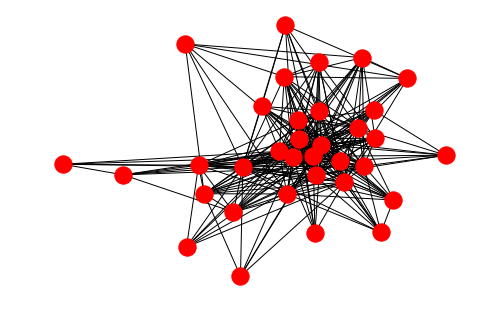

# Coordinate of Nodes: {0: array([0.03, 0.05]), 1: array([0.05, 0.08]), 2: array([0.03, 0.05]), 3: array([0.03, 0.04]), 4: array([ 0.07, -0.01]), 5: array([0.02, 0.11]), 6: array([0.03, 0.04]), 7: array([-0.,  0.]), 8: array([0.05, 0.06]), 9: array([0.03, 0.05]), 10: array([ 0.04, -0.01]), 11: array([0.05, 0.01]), 12: array([0.03, 0.05]), 13: array([0.04, 0.05]), 14: array([0.04, 0.05]), 15: array([0.02, 0.04]), 16: array([0.04, 0.06]), 17: array([0.04, 0.06]), 18: array([0.03, 0.05]), 19: array([0.07, 0.1 ]), 20: array([0.04, 0.06]), 21: array([0.05, 0.06]), 22: array([0.03, 0.05]), 23: array([0.03, 0.05]), 24: array([ 0.33, -1.  ]), 25: array([-0.07,  0.02]), 26: array([-0.5 , -0.12]), 27: array([ 0.09, -0.03]), 28: array([0.04, 0.03]), 29: array([-0.87, -0.25]), 30: array([0.03, 0.05]), 31: array([0.04, 0.07]), 32: array([0.04, 0.06]), 33: array([-0.01,  0.03])}


In [23]:
nx.draw(Gw2)
plt.show()

pos = nx.spectral_layout(Gw2)
print( "# Coordinate of Nodes:", pos )

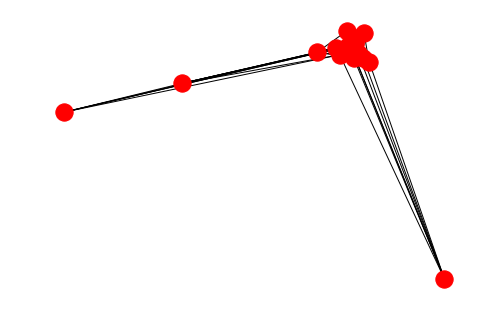

In [24]:
nx.draw_spectral(Gw2)
plt.show()